In [2]:
import polartoolkit
import verde as vd
import invert4geom
import numpy as np
import pandas as pd
import harmonica
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2
from polartoolkit import fetch, maps, profiles, regions

In [4]:
import os

os.environ["POLARTOOLKIT_HEMISPHERE"] = "south"

region = regions.getz_ice_shelf

In [5]:
bm1 = pd.read_csv('pointmaps/bm1.csv')
#bm2 = pd.read_csv('pointmaps/bm2.csv')
#bm3 = pd.read_csv('pointmaps/bm3.csv')

In [6]:
BM = pd.read_csv('pointmaps/BM.csv')

# Starting topography

## Via Spline.fit

In [12]:
spline = vd.Spline(damping=0.001)



spline.fit(coordinates=(bm1.easting, bm1.northing), data=bm1['bedrock_altitude (m)'])

,mindist,0
,damping,0.001
,force_coords,None
,engine,'auto'


In [13]:
#spline.fit(coordinates=(BM.easting, BM.northing), data=BM.bedrock_altitude)

In [14]:
grid = spline.grid(region= region, spacing = 2000, data_names = 'upward')

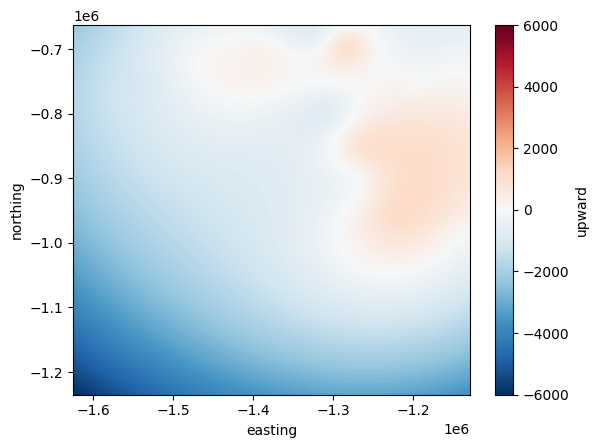

In [15]:
grid.upward.plot()


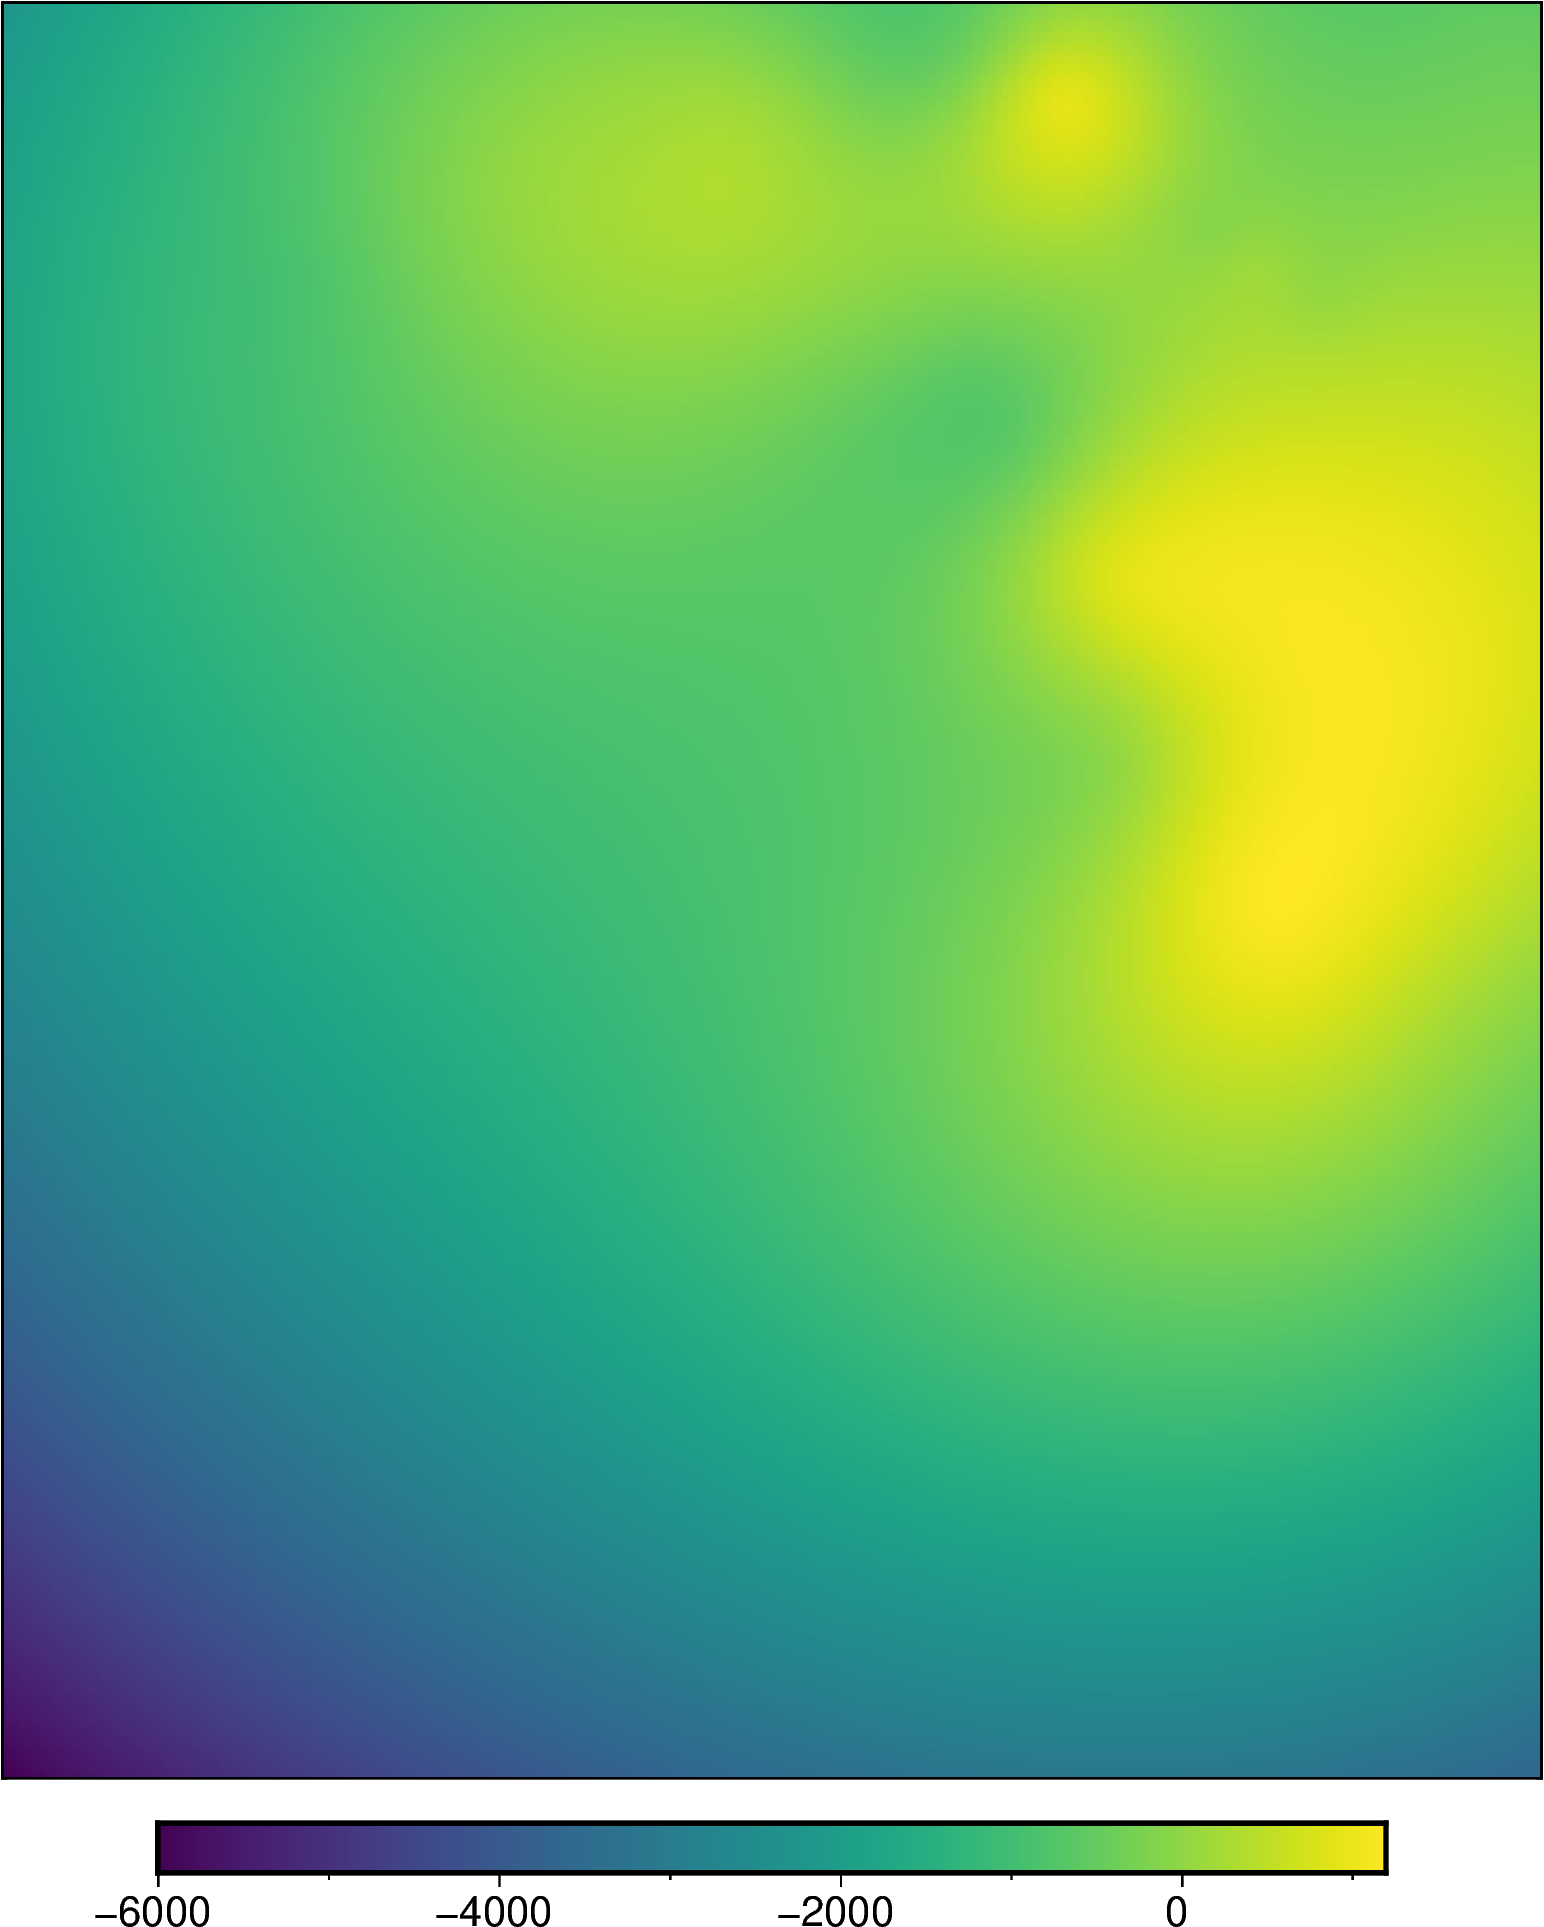

In [16]:
fig = maps.plot_grd(grid=grid.upward)
fig.show()

## via chain

In [17]:
spacing=15/60

chain = vd.Chain(
    [
        ("mean", vd.BlockReduce(np.mean, spacing=2000)),
        ("spline", vd.Spline(damping=1e-10, mindist=100e3)),
    ]
)

In [18]:
BM1 = BM.dropna()

In [19]:
#chain.fit([BM['longitude (degree_east)'],BM['latitude (degree_north)']],BM['bedrock_altitude (m)'])

chain.fit(coordinates=(BM1.easting,BM1.northing),data=BM1.bedrock_altitude)

C:\Users\iii\anaconda3\envs\Semesterproject\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.24383e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


,steps,"[('mean', ...), ('spline', ...)]"


In [20]:
#chain.fit([BM['easting'],BM['northing']],BM['bedrock_altitude'])

In [21]:
grid2 = chain.grid(region = region,  spacing = spacing*111e2, 
                  dims = ['easting','northing'], data_names = ['bed_topography'])


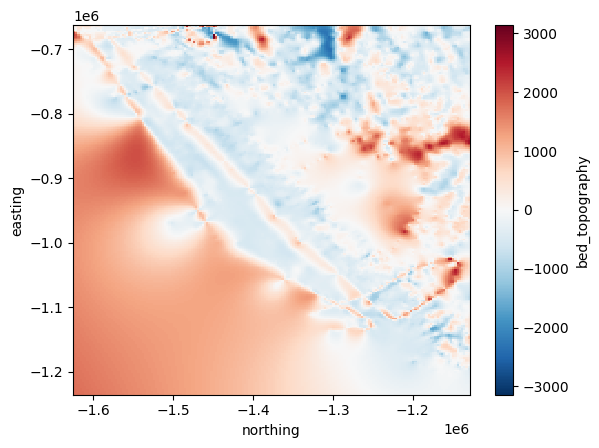

In [22]:
grid2.bed_topography.plot()

In [23]:
fig = maps.plot_grd(grid=grid2.upward)
fig.show()

AttributeError: 'Dataset' object has no attribute 'upward'